# Coral Reef Benthic Cover Data Analysis

**Author:** Sahil Bilal

**Affiliation:** B.Sc. Medical, Cluster University Srinagar

**Email:** sahiilbilal19@gmail.com

This project analyzes a real coral reef benthic cover dataset to uncover benthic community structures, variation, and correlations among cover types. Analysis includes PCA, clustering, and correlation matrix visualization.

**Data source:**  Benthic cover data from survey sites on Caribbean coral reefs, 2008-2012

benthic_cover_joined.csv dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


benthic = pd.read_csv('benthic_cover_joined.csv')


cover_cols = ['turf', 'coralline_algae', 'gorgonian', 'hard_coral', 'macroalgae', 'other_benthos', 'rubble', 'sand', 'silt', 'sponge', 'zoanthid']
for col in cover_cols:
    benthic[col] = pd.to_numeric(benthic[col], errors='coerce')


benthic_clean = benthic.dropna(subset=cover_cols)

benthic_clean.head()

,location,site,site_id,lat,lon,depth_range,date_survey,overfished_flag,turf,coralline_algae,...,rock,gorgonian,hard_coral,macroalgae,other_benthos,rubble,sand,silt,sponge,zoanthid
0,Bahamas,"Great_Inagua,_Devils_Point",B1,21.01802,-73.70638,14-Dec,25-Jul-11,N,1.28,10.24,...,23.68,3.36,14.24,16.16,0.0,4.48,9.44,0.00,15.84,0.16
1,Bahamas,"Exumas,_Danger_Reef",B2,24.42737,-76.67440,15,10-Jul-10,N,0.00,4.12,...,17.27,8.56,11.09,46.44,0.0,0.32,0.95,0.32,10.46,0.00
2,Bahamas,"Nassau,_Goulding_Cay",B3,25.02250,-77.57043,12,13-Jul-10,Y,0.00,1.44,...,21.63,5.61,18.75,29.80,0.0,0.00,7.37,0.96,14.42,0.00
3,Bahamas,"Bimini,_Hawksbill_Reef_North",B4,25.75527,-79.30102,14,14-Jul-10,Y,0.00,0.96,...,24.96,0.16,5.44,44.64,0.0,0.32,1.92,1.12,20.48,0.00
4,Bahamas,Hogsty_Reef,B5,21.67015,-73.83735,14-15,23-Jul-11,N,1.60,4.48,...,27.84,0.64,12.48,22.08,0.0,0.80,5.76,0.00,24.16,0.00


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering


benthic = pd.read_csv('benthic_cover_joined.csv')


cover_cols = ['turf', 'coralline_algae', 'gorgonian', 'hard_coral', 'macroalgae', 'other_benthos', 'rubble', 'sand', 'silt', 'sponge', 'zoanthid']
for col in cover_cols:
    benthic[col] = pd.to_numeric(benthic[col], errors='coerce')


benthic_clean = benthic.dropna(subset=cover_cols).copy()  # Create an explicit copy


scaler = StandardScaler()
data_scaled = scaler.fit_transform(benthic_clean[cover_cols])


pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_scaled)


benthic_clean.loc[:, 'PC1'] = pca_result[:, 0]
benthic_clean.loc[:, 'PC2'] = pca_result[:, 1]



agg_clustering = AgglomerativeClustering(n_clusters=3)
benthic_clean.loc[:, 'Cluster'] = agg_clustering.fit_predict(data_scaled)


benthic_clean.head()


,location,site,site_id,lat,lon,depth_range,date_survey,overfished_flag,turf,coralline_algae,...,macroalgae,other_benthos,rubble,sand,silt,sponge,zoanthid,PC1,PC2,Cluster
0,Bahamas,"Great_Inagua,_Devils_Point",B1,21.01802,-73.70638,14-Dec,25-Jul-11,N,1.28,10.24,...,16.16,0.0,4.48,9.44,0.00,15.84,0.16,-0.127262,-0.726426,0
1,Bahamas,"Exumas,_Danger_Reef",B2,24.42737,-76.67440,15,10-Jul-10,N,0.00,4.12,...,46.44,0.0,0.32,0.95,0.32,10.46,0.00,-1.053257,-0.600816,2
2,Bahamas,"Nassau,_Goulding_Cay",B3,25.02250,-77.57043,12,13-Jul-10,Y,0.00,1.44,...,29.80,0.0,0.00,7.37,0.96,14.42,0.00,-0.138865,0.001622,2
3,Bahamas,"Bimini,_Hawksbill_Reef_North",B4,25.75527,-79.30102,14,14-Jul-10,Y,0.00,0.96,...,44.64,0.0,0.32,1.92,1.12,20.48,0.00,-0.485366,-1.027172,2
4,Bahamas,Hogsty_Reef,B5,21.67015,-73.83735,14-15,23-Jul-11,N,1.60,4.48,...,22.08,0.0,0.80,5.76,0.00,24.16,0.00,-0.000964,-0.738638,2


# PCA and KMeans clustering

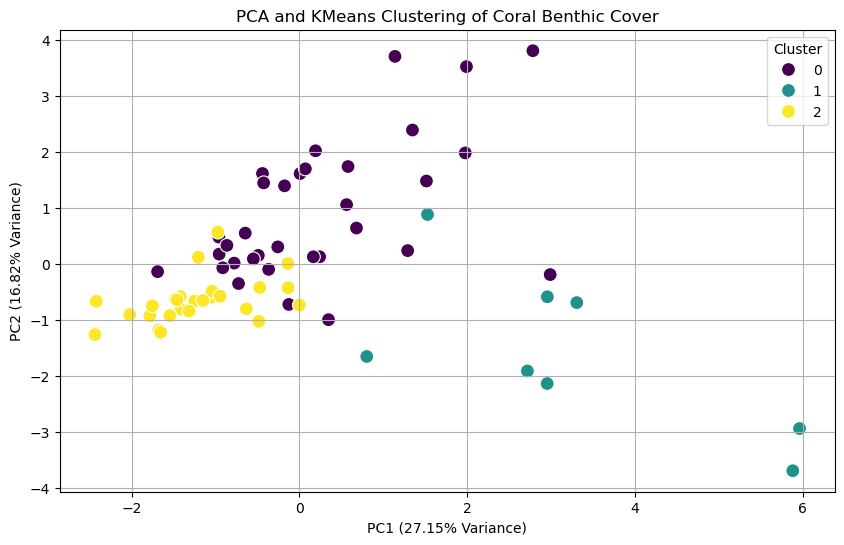

In [3]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=benthic_clean, x='PC1', y='PC2', hue='Cluster', palette='viridis', s=100)
plt.title('PCA and KMeans Clustering of Coral Benthic Cover')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} Variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} Variance)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Correlation matrix and heatmap

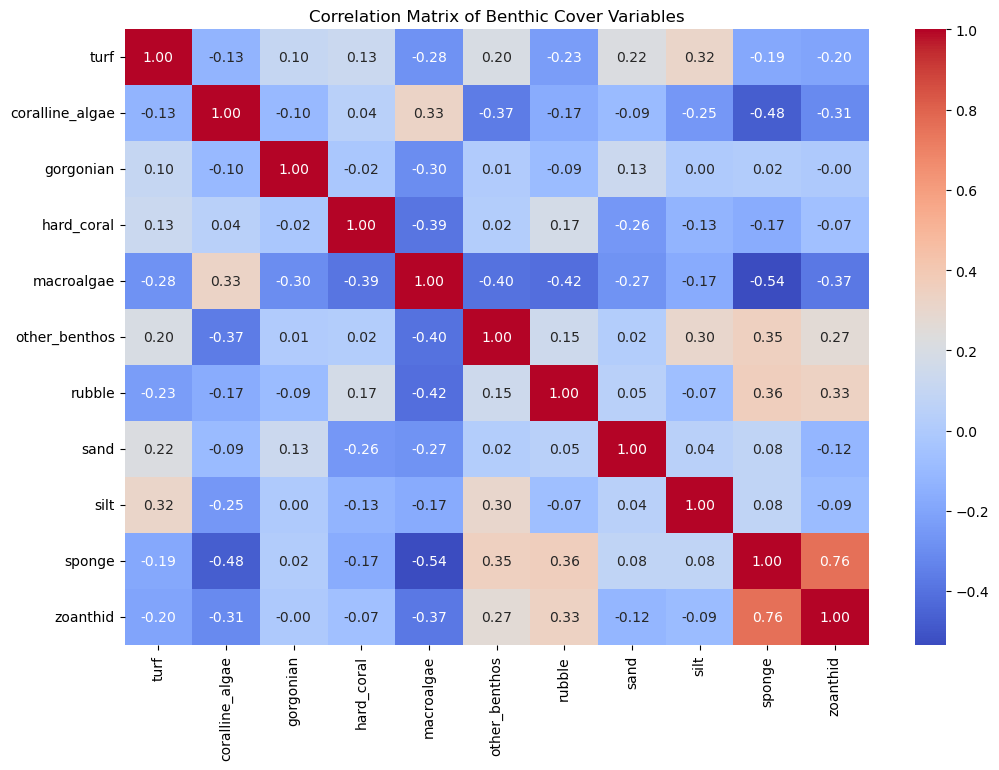

In [4]:

corr = benthic_clean[cover_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Benthic Cover Variables')
plt.show()

# Summary statistics

In [5]:

benthic_clean[cover_cols].describe()

,turf,coralline_algae,gorgonian,hard_coral,macroalgae,other_benthos,rubble,sand,silt,sponge,zoanthid
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,10.105147,5.576176,2.754412,16.365000,28.988971,0.466029,1.926618,5.520441,1.131324,15.888824,0.445147
std,9.384855,3.807487,3.605984,10.307791,18.776295,0.805559,2.706875,4.049393,3.474171,12.875704,1.500444
min,0.000000,0.000000,0.000000,1.440000,0.000000,0.000000,0.000000,0.320000,0.000000,2.240000,0.000000
25%,2.240000,2.960000,0.320000,8.560000,14.160000,0.000000,0.320000,1.880000,0.000000,7.640000,0.000000
50%,7.840000,4.960000,1.040000,14.800000,28.675000,0.160000,0.990000,5.040000,0.160000,12.530000,0.000000
75%,15.560000,8.400000,3.720000,23.000000,45.090000,0.480000,1.800000,8.320000,0.480000,19.120000,0.160000
max,38.400000,17.280000,16.960000,38.080000,68.000000,3.840000,12.960000,16.960000,25.440000,74.400000,8.480000
